# Dataset Description
<hr />

#### From https://www.kaggle.com/crawford/gene-expression:  This dataset comes from a proof-of-concept study published in 1999 by Golub et al. It showed how new cases of cancer could be classified by gene expression monitoring (via DNA microarray) and thereby provided a general approach for identifying new cancer classes and assigning tumors to known classes. These data were used to classify patients with acute myeloid leukemia (AML) and acute lymphoblastic leukemia (ALL). 

#### There is a training dataset that contain 38 samples and a test dataset that contains 34 samples used in the paper (one sample per patient). Both datasets contain ALL and AML sample measurements from Bone Marrow and Peripheral Blood. According to Kaggle and the paper, intensity values have been re-scaled such that overall intensities for each chip are equivalent. 

#### Acknowledgments

#### Molecular Classification of Cancer: Class Discovery and Class Prediction by Gene Expression

#### Science 286:531-537. (1999). Published: 1999.10.14

#### T.R. Golub, D.K. Slonim, P. Tamayo, C. Huard, M. Gaasenbeek, J.P. Mesirov, H. Coller, M. Loh, J.R. Downing, M.A. Caligiuri, C.D. Bloomfield, and E.S. Lander

In [1]:
import pandas as pd
from matplotlib import pyplot

In [2]:
# Load the Dataset

test_data=pd.read_csv('data_set_ALL_AML_independent.csv')
training_data=pd.read_csv('data_set_ALL_AML_train.csv')
patient_cancer_labels=pd.read_csv('actual.csv')

In [3]:
# Dataset Analysis

#### shape 
training_data_shape = training_data.shape
test_data_shape = test_data.shape
patient_cancer_shape = patient_cancer_labels.shape
print("Training Data Shape: %s rows, %s columns" % (training_data_shape[0], training_data_shape[1]))
print("Testing Data Shape: %s rows,%s columns" % (test_data_shape[0], test_data_shape[1]))
print("Patient Cancer Label Data Shape: %s rows,%s columns" % (patient_cancer_shape[0], patient_cancer_shape[1]))

Training Data Shape: 7129 rows, 78 columns
Testing Data Shape: 7129 rows,70 columns
Patient Cancer Label Data Shape: 72 rows,2 columns


In [4]:
#### First 5 rows
training_data.head()


,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [5]:
#### First 5 rows
test_data.head()

,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


In [6]:
patient_cancer_labels.head(5)

,patient,cancer
0,1,ALL
1,2,ALL
2,3,ALL
3,4,ALL
4,5,ALL


In [7]:
print(patient_cancer_labels.groupby('cancer').size())

cancer
ALL    47
AML    25
dtype: int64


In [8]:
#### The columns labeled as "call" do not seem to help with classification so they can be filtered out

def drop_columns_containing_call(df):
    return [col for col in df.columns if "call" not in col]

training_data=training_data[drop_columns_containing_call(training_data)]
test_data=test_data[drop_columns_containing_call(test_data)]
training_data=training_data.drop("Gene Description", axis=1)
test_data=test_data.drop("Gene Description", axis=1)

#### Transpose both training and testing dataframes. This makes each gene a feature for the machine learning models. Each row represents a sample and the values represent the microarray data

test_data = test_data.T
training_data = training_data.T

test_data.columns = test_data.iloc[0]
training_data.columns = training_data.iloc[0]
test_data = test_data.drop(test_data.index[0]).apply(pd.to_numeric)
training_data = training_data.drop(training_data.index[0]).apply(pd.to_numeric)

#### Combine the data sets from separate files into a single data set and eventually choose 20% of the samples as validation set

microarray_data = pd.concat([training_data, test_data], axis=0).reset_index(drop=True)

microarray_shape = microarray_data.shape

In [9]:
print(microarray_shape)
microarray_data.head()

(72, 7129)


Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
0,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
1,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
2,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
3,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
4,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


In [10]:
microarray_data.describe().round()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
count,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,...,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0
mean,-115.0,-160.0,-8.0,189.0,-253.0,-396.0,-65.0,-191.0,80.0,98.0,...,175.0,668.0,-12.0,382.0,-34.0,781.0,304.0,10.0,433.0,-31.0
std,98.0,96.0,123.0,112.0,122.0,150.0,285.0,100.0,89.0,227.0,...,94.0,306.0,87.0,379.0,52.0,451.0,207.0,45.0,624.0,40.0
min,-476.0,-531.0,-410.0,-36.0,-541.0,-810.0,-1038.0,-463.0,-148.0,-468.0,...,-58.0,91.0,-295.0,-24.0,-220.0,67.0,-42.0,-207.0,-68.0,-190.0
25%,-148.0,-214.0,-77.0,100.0,-344.0,-501.0,-221.0,-238.0,6.0,-58.0,...,112.0,462.0,-54.0,200.0,-63.0,519.0,174.0,-8.0,124.0,-55.0
50%,-100.0,-144.0,-14.0,179.0,-228.0,-394.0,-58.0,-175.0,78.0,98.0,...,173.0,632.0,3.0,286.0,-24.0,702.0,295.0,10.0,218.0,-28.0
75%,-58.0,-97.0,49.0,278.0,-174.0,-282.0,87.0,-121.0,140.0,214.0,...,225.0,823.0,45.0,457.0,2.0,1016.0,386.0,30.0,373.0,-4.0
max,86.0,-13.0,312.0,431.0,114.0,-122.0,709.0,-11.0,283.0,878.0,...,413.0,1653.0,218.0,2527.0,52.0,2315.0,1109.0,115.0,3193.0,78.0


In [11]:
sample = microarray_data.sample(n=50, axis=1)
sample.describe().round()

Gene Accession Number,U06088_at,X07619_s_at,D88532_at,X74929_s_at,U58090_at,X02544_at,D29833_at,M54914_s_at,L41913_at,U52827_at,...,U12775_at,U83239_s_at,M15205_at,M96954_s_at,X16316_at,U47025_s_at,U35100_at,X69433_at,U46767_at,X65867_at
count,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,...,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0,72.0
mean,142.0,28.0,-4.0,-110.0,119.0,-222.0,1.0,-21.0,6.0,-19.0,...,37.0,1892.0,1046.0,582.0,1483.0,767.0,-1193.0,1639.0,34.0,442.0
std,176.0,192.0,96.0,198.0,95.0,122.0,61.0,62.0,41.0,65.0,...,77.0,559.0,526.0,241.0,555.0,234.0,519.0,891.0,49.0,170.0
min,-259.0,-355.0,-185.0,-815.0,-101.0,-601.0,-196.0,-239.0,-89.0,-161.0,...,-160.0,986.0,279.0,159.0,457.0,319.0,-3073.0,632.0,-105.0,121.0
25%,46.0,-106.0,-73.0,-224.0,51.0,-274.0,-34.0,-54.0,-14.0,-49.0,...,-4.0,1518.0,693.0,408.0,1103.0,618.0,-1496.0,1080.0,0.0,342.0
50%,118.0,21.0,-1.0,-92.0,108.0,-216.0,4.0,-18.0,2.0,-12.0,...,29.0,1727.0,966.0,559.0,1420.0,730.0,-1148.0,1416.0,32.0,396.0
75%,229.0,166.0,52.0,19.0,160.0,-134.0,42.0,12.0,24.0,26.0,...,67.0,2144.0,1266.0,714.0,1714.0,871.0,-817.0,1862.0,66.0,543.0
max,687.0,596.0,235.0,298.0,345.0,23.0,122.0,125.0,132.0,139.0,...,227.0,3715.0,2967.0,1209.0,4112.0,1548.0,-415.0,5944.0,137.0,1050.0


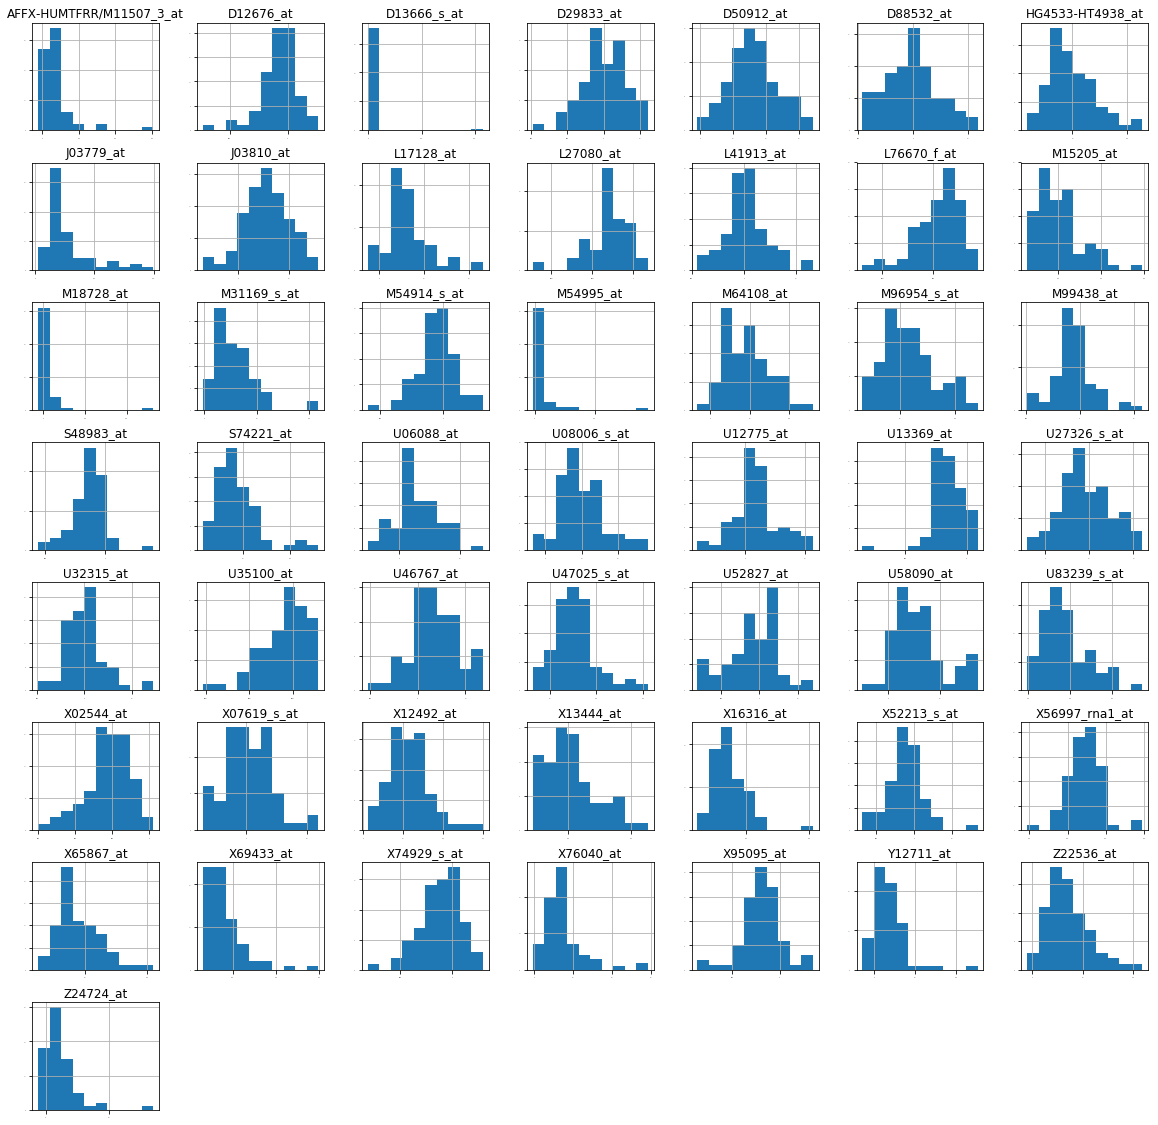

In [12]:
sample.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(20,20))
pyplot.show()

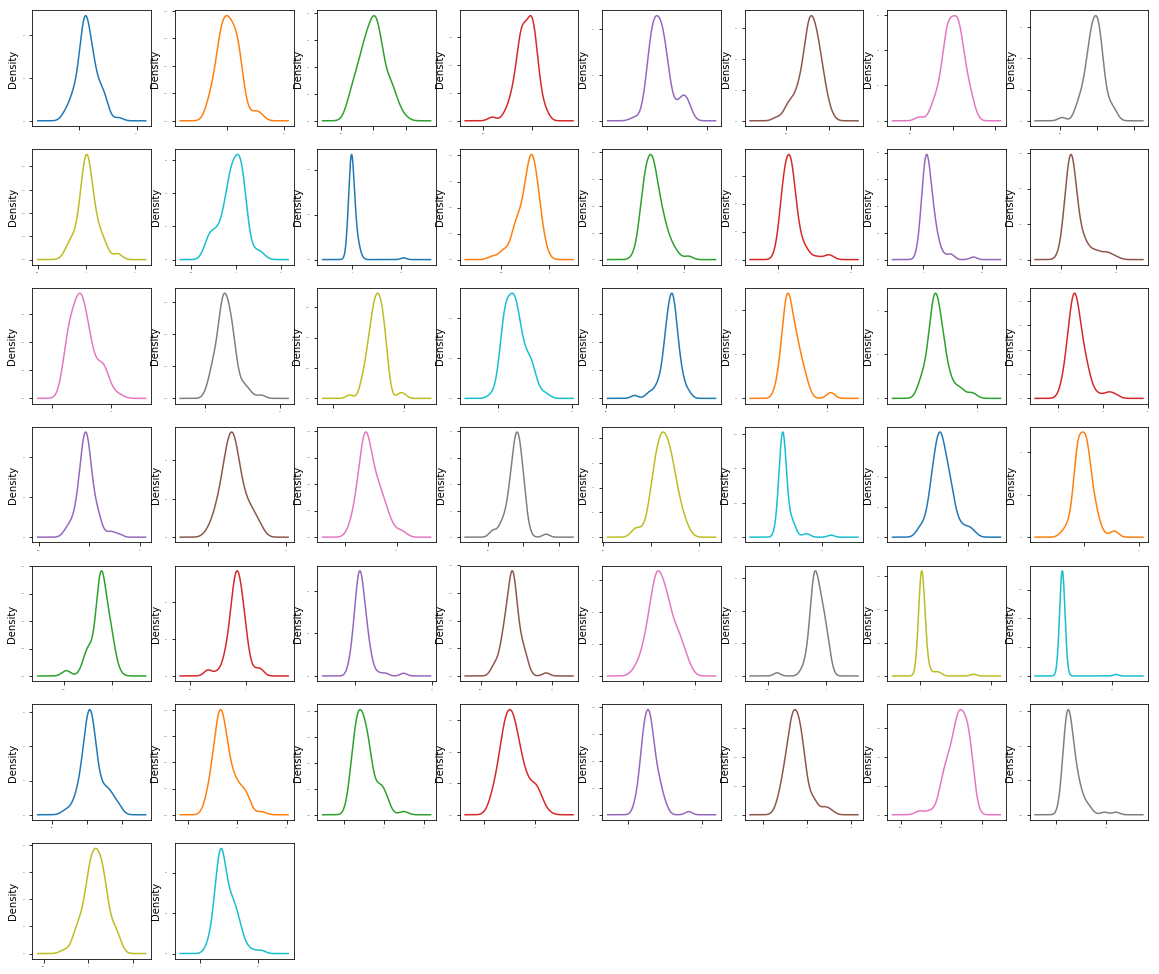

In [13]:
sample.plot(kind='density', subplots=True, layout=(8,8), sharex=False, legend=False,
    fontsize=1, figsize=(20,20))
pyplot.show()

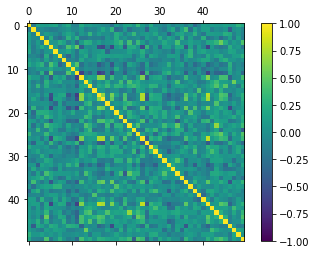

In [14]:
fig = pyplot.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(sample.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
pyplot.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [16]:
X = microarray_data.values[:,0:microarray_shape[1]].astype(float)
Y = patient_cancer_labels.values[0:microarray_shape[0]:,1]
validation_size = 0.20
seed=7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
    test_size=validation_size, random_state=seed)

In [17]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'
models = []
models.append(('LR' , LogisticRegression()))
models.append(('LDA' , LinearDiscriminantAnalysis()))
models.append(('KNN' , KNeighborsClassifier()))
models.append(('CART' , DecisionTreeClassifier()))
models.append(('NB' , GaussianNB()))
models.append(('SVM' , SVC()))

results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.790000 (0.122972)


/Users/anishdalal/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/anishdalal/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/anishdalal/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/anishdalal/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/anishdalal/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/anishdalal/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are

LDA: 0.736667 (0.185861)
KNN: 0.683333 (0.181506)
CART: 0.616667 (0.188709)
NB: 0.810000 (0.164688)
SVM: 0.676667 (0.259508)


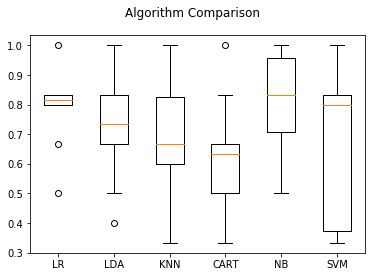

In [18]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [19]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.770000 (0.152352)


/Users/anishdalal/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/anishdalal/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/anishdalal/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/anishdalal/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/anishdalal/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/anishdalal/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are

ScaledLDA: 0.736667 (0.185861)
ScaledKNN: 0.753333 (0.214061)
ScaledCART: 0.673333 (0.228425)
ScaledNB: 0.810000 (0.164688)
ScaledSVM: 0.676667 (0.259508)


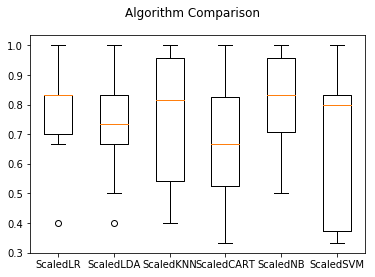

In [20]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [21]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
param_grid = dict(C=c_values)
model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.526316 using {'C': 0.1}
0.526316 (0.198409) with: {'C': 0.1}
0.508772 (0.207136) with: {'C': 0.3}
0.508772 (0.207136) with: {'C': 0.5}
0.508772 (0.207136) with: {'C': 0.7}
0.508772 (0.207136) with: {'C': 0.9}
0.508772 (0.207136) with: {'C': 1.0}
0.508772 (0.207136) with: {'C': 1.3}
0.508772 (0.207136) with: {'C': 1.5}
0.508772 (0.207136) with: {'C': 1.7}
0.508772 (0.207136) with: {'C': 2.0}


In [22]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

AB: 0.770000 (0.199694)
GBM: 0.603333 (0.202457)
RF: 0.636667 (0.174770)
ET: 0.690000 (0.221133)


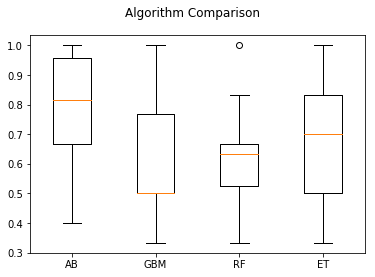

In [23]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [24]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
rescaledValidationX = scaler.transform(X_validation)

In [25]:
model = GaussianNB()
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8
[[7 2]
 [1 5]]
             precision    recall  f1-score   support

        ALL       0.88      0.78      0.82         9
        AML       0.71      0.83      0.77         6

avg / total       0.81      0.80      0.80        15



In [26]:
# prepare the model
model = LogisticRegression(C=0.1)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.866666666667
[[9 0]
 [2 4]]
             precision    recall  f1-score   support

        ALL       0.82      1.00      0.90         9
        AML       1.00      0.67      0.80         6

avg / total       0.89      0.87      0.86        15

